In [1]:
%cd ..

c:\Code\Armband


In [2]:
import numpy as np
import pandas as pd
import random
import os
#import keras_tuner as kt
from scipy import signal
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as layers
from tensorflow.keras.layers import GlobalMaxPooling2D, Activation, Dense, Conv1D, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras import optimizers

%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras import regularizers



from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from utils.signal import DCFilter, normalize
from utils.visualize import showMe, showHistory, showAvg
from utils.augment import apply_augment


from utils.models.regression.conv2 import get_model

from utils.data import load_set, pre_process_set, format2train, shuffle
from utils.sampler_generator import SamplerGenerator
from config.continous import settings
from utils.visualizer import Visualizer
%load_ext autoreload
%autoreload 2

In [11]:
end_label = True
generator = SamplerGenerator(settings, batch_size=64, n_steps = 500, end_label=end_label)
vis = Visualizer()

Loading 2 sessions...
X_store shape: (8, 92503)
y_store shape: (2, 92503)
X_store shape: (8, 26650)
y_store shape: (2, 26650)
Loaded 2 sessions


In [12]:
print(generator[0][0].shape)
print(generator[0][1].shape)

(64, 8, 500)
(64, 2)


In [13]:
model = get_model(end_label)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 8, 500)]     0           []                               
                                                                                                  
 reshape (Reshape)              (None, 8, 500, 1)    0           ['input[0][0]']                  
                                                                                                  
 average_pooling2d (AveragePool  (None, 8, 250, 1)   0           ['reshape[0][0]']                
 ing2D)                                                                                           
                                                                                                  
 conv2d (Conv2D)                (None, 8, 250, 200)  2200        ['average_pooling2d[0][0]']  

In [14]:

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=20,
    decay_rate=0.98
    )
    

opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#opt = keras.optimizers.Adam()


model.compile(optimizer=opt,
          loss='mean_absolute_error',
          metrics=['accuracy']
         )

Epoch 1/10
500/500 [==============================] - 11s 17ms/step - loss: 2.5783 - dense_1_loss: 0.5922 - dense_2_loss: 0.9021 - dense_1_accuracy: 0.2085 - dense_2_accuracy: 0.2270
Epoch 2/10
500/500 [==============================] - 9s 17ms/step - loss: 1.8056 - dense_1_loss: 0.5790 - dense_2_loss: 0.8133 - dense_1_accuracy: 0.1839 - dense_2_accuracy: 0.2551
Epoch 3/10
500/500 [==============================] - 8s 17ms/step - loss: 1.5953 - dense_1_loss: 0.5747 - dense_2_loss: 0.8019 - dense_1_accuracy: 0.1681 - dense_2_accuracy: 0.2602
Epoch 4/10
500/500 [==============================] - 8s 17ms/step - loss: 1.5219 - dense_1_loss: 0.5705 - dense_2_loss: 0.7926 - dense_1_accuracy: 0.1655 - dense_2_accuracy: 0.2639
Epoch 5/10
500/500 [==============================] - 8s 17ms/step - loss: 1.4451 - dense_1_loss: 0.5689 - dense_2_loss: 0.7767 - dense_1_accuracy: 0.1578 - dense_2_accuracy: 0.2727
Epoch 6/10
500/500 [==============================] - 8s 17ms/step - loss: 1.4098 - dense

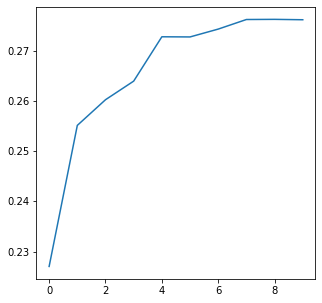

In [15]:
history = model.fit(generator,
                    #validation_data=(val_X, val_y),
                    batch_size=64,
                    epochs=10
                  )

showHistory(history)          